# Теория
Экспоненциальное (показательное) распределение — абсолютно непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.
Случайная величина $X$  имеет экспоненциальное распределение с параметром $\lambda> 0$, если её плотность имеет вид

$f{X}(x)=\begin{cases}\lambda \,e^{-\lambda x},&x\geq 0,\\0,&x<0.\end{cases}$

Тогда сама функцию экспоненциального распределения имеет вид

$F{X}(x)=\begin{cases}1- \,e^{-\lambda x},&x\geq 0,\\0,&x<0.\end{cases}$

Математическое ожидание и дисперсия равны:

$\mathbb {E} [X]=\frac {1}{\lambda },$
   
$\mathbb {D} [X]={\frac {1}{\lambda ^{2}}},$

при этом

$\mathbb E [X^n]={\frac {n!}{\lambda ^{n}}}.$

__Пример__. Пусть есть магазин, в который время от времени заходят покупатели. При определённых допущениях время между появлениями двух последовательных покупателей будет случайной величиной с экспоненциальным распределением. Среднее время ожидания нового покупателя равно $1/\lambda$ . Сам параметр $\lambda$ тогда может быть интерпретирован как среднее число новых покупателей за единицу времени.


# Реализация на Python'e

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

1. Генерируем выборку объёма 1000 при помощи функции rvs(scale, loc, size) из библиотеки scipy.stats.expon. Параметр __scale__ ответственен за форму, __loc__ - сдвиг функции, а __size__ задает объем.

In [123]:
from scipy.stats import expon
import math

# Задаём значение лямбды и вычисляем значения мат. ожидания и дисперсии
#Иначе по умолчанию лямбда 1, мат.ожидание 0, дисперсия 1
l=0.5
E=1/l
D=1/(l**2)

#Параметр scale в функции expon библиотеки scipy.stats.expon равен  1/lambda
#параметром loc задаем мат.ожидание
data_expon_0=expon.rvs(loc=E,scale=1/l,size=1000)


2. Посторим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины. Для построения гистограммы воспользуемся функцией __hist__ из библиотеки __matplotlib__. В качестве параметров передадим сгенерированную выборку, количество "карманов"(n) и вместо предложенного параметра __normalized__ воспользуемся параметром __density__, так как первый не рекомендуется. Далее зададим массив значений иксов при помощи __np.linespace__. Значения функции плотности от __x(expon.pdf)__ будем записывать в массив **y** 
.  Отобразим функцию плотности на графике при помощи функции  __plot__, а также попишем оси (ylabel, xlabel).

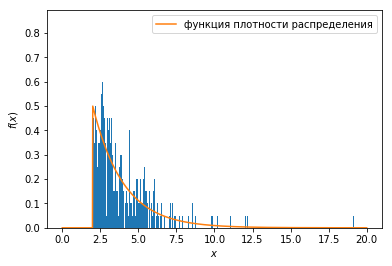

In [124]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(data_expon_0,range=(0,20), bins=1000, density=True)

x = np.linspace(0,20,1000)
#Вычисляем значение функции плотности распределения, задав параметры scale и lambda
y = expon.pdf(x, loc=E, scale=1/l)
plt.plot(x, y, label='функция плотности распределения')
plt.show

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='best')

3. Оценим распределения выборочного среднего случайной величины при разных объёмах выборок. 

а)n=5

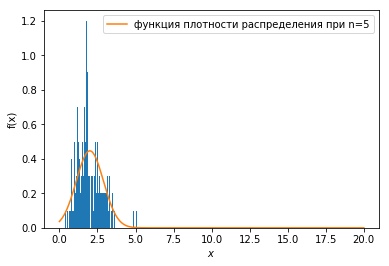

In [119]:
import scipy.stats as sts
n=5
#массив выборочных средних
sample5=np.array([])

l=0.5
E=2.0
D=4.0

i=1
while i <= 1000:#цикл генерации случайных выборок количества n из функции
    sample5i = expon.rvs(scale= 1/l,size=n)#генерация выборки, здесь задается scale для передачи значения lamba в expon( иначе по умолчанию lambda=1)
    mean5i=sum(sample5i)/n#определение выборочного среднего (в.с.)
    sample5=np.append(sample5,mean5i)#добавляем в массив новое значение в.с.
    i+=1
    
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=5
D5=D/n#дисперсия для нормального распределения приближающего выборку средних по ЦПД
sigma5=math.sqrt(D5)# среднеквадратичное отклонение для нормального распределения выборки средних
norm5 = sts.norm(E, sigma5)#определяем нормальное распределение с полученными расчетными характеристиками
pdf5 = norm5.pdf(x)#получаем плотность распределения

#строим гистограмму массива средних при n=5 и плотность описывающую этот массив нормального распределения
plt.hist(sample5, bins =1000, range=(0,10), density=True)
plt.plot(x, pdf5, label='функция плотности распределения при n=5')
plt.ylabel('f(x)')
plt.xlabel('$x$')
plt.legend(loc='best')

б)n=10

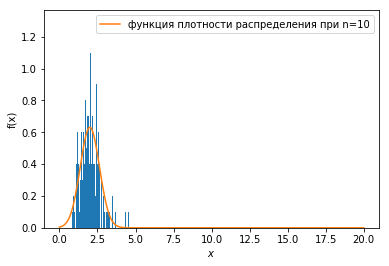

In [118]:
n=10
sample10=np.array([])
i=1
l=0.5
E=2.0
D=4.0
while i <= 1000:
    sample10i = expon.rvs(scale=1/l,size=n)
    mean10i=sum(sample10i)/n#
    sample10=np.append(sample10,mean10i)
    i+=1
    
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=10
E=2.0
D=4.0
D10=D/n
sigma10=math.sqrt(D10)
norm10 = sts.norm(E, sigma10)
pdf10 = norm10.pdf(x)

#строим гистограмму массива средних при n=10 и плотность описывающую этот массив нормального распределения
plt.hist(sample10, bins =1000, range=(0,10), density=True)
plt.plot(x, pdf10, label='функция плотности распределения при n=10')
plt.ylabel('f(x)')
plt.xlabel('$x$')
plt.legend(loc='best')

в)n=100

(0.0, 3.0)

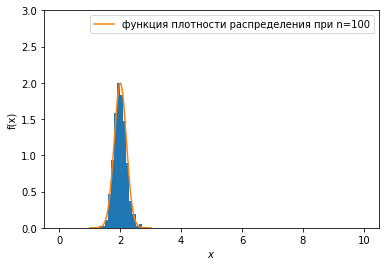

In [135]:
n=100
sample100=np.array([])
#"сузим" массив значений x-в, так как с ростом n гафик тоже сужается
x=np.linspace(1,3,1000)
i=1
l=0.5
E=2.0
D=4.0

while i <= 1000:
    sample100i = expon.rvs(size=n, scale=1/l)
    mean100i=sum(sample100i)/n
    sample100=np.append(sample100,mean100i)
    i+=1
    
#определим параметры нормального распределения описывающие массив 1000 в.с. при n=100
D100=D/n
sigma100=math.sqrt(D100)
norm100 = sts.norm(E, sigma100)
pdf100 = norm100.pdf(x)

plt.hist(sample100, bins =100, range=(0,10), density=True)
plt.plot(y, pdf100, label='функция плотности распределения при n=100')
plt.ylabel('f(x)')
plt.xlabel('$x$')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_ylim([0.0,3.0])

## Вывод 
По трём полученным гистограммам выборочных средних можно заметить, что с ростом объема выборки(n) гистограмма сглаживается и точность аппроксимации возрастает. Это можно объяснить тем, что среднеквадратичное отклонение выборочных средних с ростом объёма сокращается. Вместе с тем можно отметить скошенность функции, несемметричность относительно центра и медленную сходимость. Так, при n=(5,10) сложно определить мат.ожидание функции по графику. Таким образом, для получения более точных результатов необходимо использовать выборки объёмом от 100 и выше для аппроксимации выборочных средних экспоненциальной(показательной) функции.  